In [99]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:95% !important; }</style>")) 

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [45]:
len(train_data), len(test_data)

(8982, 2246)

In [46]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [47]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [48]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [49]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [120]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [121]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, 
                            partial_y_train,
                            epochs=20,
                            batch_size=256,
                            validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 181us/step - loss: 2.2148 - acc: 0.5897 - val_loss: 1.4749 - val_acc: 0.6950
Epoch 2/20
7982/7982 [==============================] - 1s 133us/step - loss: 1.1536 - acc: 0.7692 - val_loss: 1.1103 - val_acc: 0.7630
Epoch 3/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.8216 - acc: 0.8336 - val_loss: 0.9724 - val_acc: 0.7960
Epoch 4/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.6187 - acc: 0.8782 - val_loss: 0.8857 - val_acc: 0.8140
Epoch 5/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.4782 - acc: 0.9042 - val_loss: 0.8368 - val_acc: 0.8210
Epoch 6/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.3740 - acc: 0.9217 - val_loss: 0.8147 - val_acc: 0.8260
Epoch 7/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.3001 - acc: 0.9366 - val_loss: 0.7929 - val_acc: 0.8350


<IPython.core.display.Javascript object>


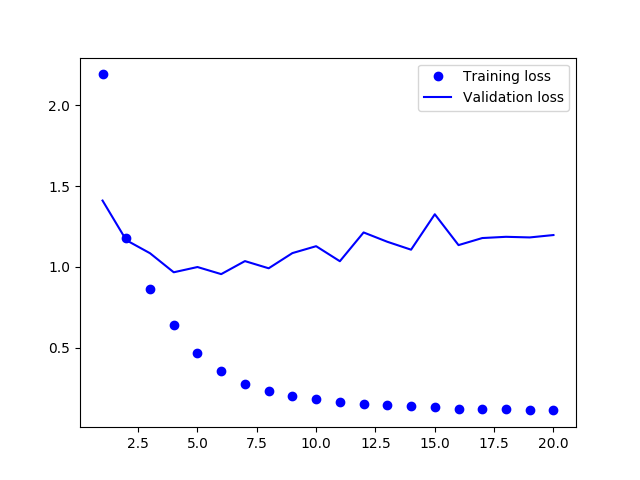

In [118]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

<IPython.core.display.Javascript object>


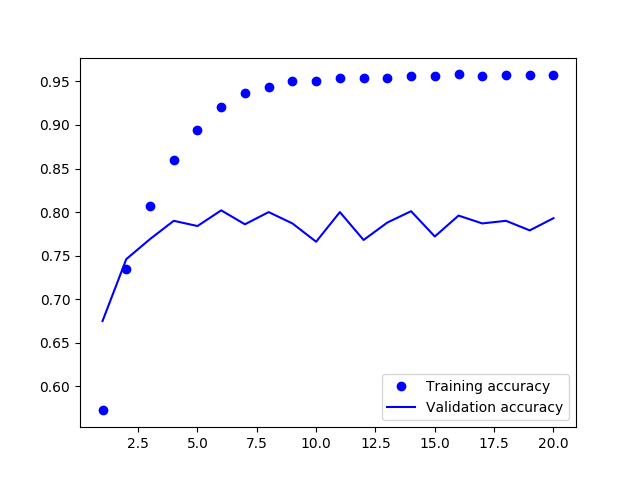

In [119]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend()

In [111]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model.fit(x_train, 
              one_hot_train_labels,
              epochs=8,
              batch_size=512)

Epoch 1/6
8982/8982 [==============================] - 1s 139us/step - loss: 2.3598 - acc: 0.5111
Epoch 2/6
8982/8982 [==============================] - 1s 106us/step - loss: 1.2924 - acc: 0.7188
Epoch 3/6
8982/8982 [==============================] - 1s 107us/step - loss: 0.9790 - acc: 0.7916
Epoch 4/6
8982/8982 [==============================] - 1s 107us/step - loss: 0.7540 - acc: 0.8385
Epoch 5/6
8982/8982 [==============================] - 1s 110us/step - loss: 0.5887 - acc: 0.8760
Epoch 6/6
8982/8982 [==============================] - 1s 107us/step - loss: 0.4568 - acc: 0.9047


In [69]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 103us/step


[0.9650251175395528, 0.7840605521456854]

In [73]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18076580587711488

<IPython.core.display.Javascript object>


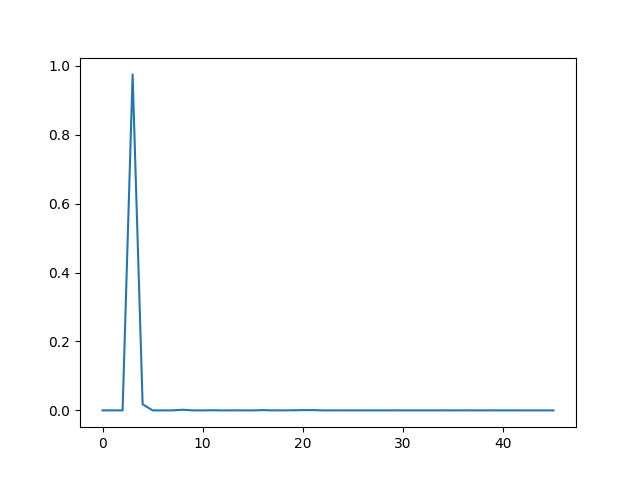

In [96]:
predictions = model.predict(x_test)

plt.figure()
plt.plot(predictions[0])

In [122]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model.fit(x_train, 
              one_hot_train_labels,
              epochs=7,
              batch_size=512)
model.evaluate(x_test, one_hot_test_labels)

Epoch 1/7
8982/8982 [==============================] - 1s 155us/step - loss: 2.4190 - acc: 0.5610
Epoch 2/7
8982/8982 [==============================] - 1s 109us/step - loss: 1.3501 - acc: 0.7312
Epoch 3/7
8982/8982 [==============================] - 1s 110us/step - loss: 0.9973 - acc: 0.7986
Epoch 4/7
8982/8982 [==============================] - 1s 136us/step - loss: 0.7824 - acc: 0.8426
Epoch 5/7
8982/8982 [==============================] - 1s 110us/step - loss: 0.6289 - acc: 0.8761
Epoch 6/7
8982/8982 [==============================] - 1s 110us/step - loss: 0.5135 - acc: 0.8975
Epoch 7/7
2246/2246 [==============================] - 0s 128us/step


[0.9045519903103156, 0.7974176313711507]